# <h1 style="font-size:3rem;color:blue;">Problem Set 3</h1>

### Question 1: Consider the following Python module:

#### Introduction: Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
#### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

#### Step 2. Import the dataset from this address
(https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

In [2]:
link = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
data1 = pd.read_csv(link, sep = "|")

#### Step 3. Assign it to a variable called users

In [3]:
users = data1
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


#### Step 4. Discover what is the mean age per occupation

In [4]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

#### Step 5. Discover the Male ratio per occupation and sort it from the most to the least

In [5]:
# count gender as ratio
genders = users.groupby('occupation')['gender'].value_counts(normalize=True)
genders.head()

occupation     gender
administrator  M         0.544304
               F         0.455696
artist         M         0.535714
               F         0.464286
doctor         M         1.000000
Name: gender, dtype: float64

In [6]:
# save as pd, and change the name of gender
genderspd = pd.DataFrame(genders)
genderspd.rename(columns={'gender':'ratio'}, inplace=True)
genderspd.head()

ratio
occupation    gender          
administrator M       0.544304
              F       0.455696
artist        M       0.535714
              F       0.464286
doctor        M       1.000000

In [7]:
# reset(remove) the level -- need to sort and only for male
new_genpd = pd.DataFrame(genderspd.reset_index(level=['occupation', 'gender']))
new_genpd.head()

,occupation,gender,ratio
0,administrator,M,0.544304
1,administrator,F,0.455696
2,artist,M,0.535714
3,artist,F,0.464286
4,doctor,M,1.000000


In [8]:
males = new_genpd[new_genpd['gender'] == 'M'].sort_values(by='ratio',ascending=False)
males

,occupation,gender,ratio
4,doctor,M,1.000000
7,engineer,M,0.970149
37,technician,M,0.962963
29,retired,M,0.928571
27,programmer,M,0.909091
11,executive,M,0.906250
33,scientist,M,0.903226
9,entertainment,M,0.888889
17,lawyer,M,0.833333
31,salesman,M,0.750000


#### Step 6. For each occupation, calculate the minimum and maximum ages

In [9]:
# Aggregate using one or more operations over the specified axis.
users.groupby('occupation').age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


#### Step 7. For each combination of occupation and sex, calculate the mean age

In [10]:
users.groupby(['occupation', 'gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

#### Step 8. For each occupation present the percentage of women and men

In [11]:
new_genpd2 = new_genpd.rename(columns={'ratio':'percentage'})
new_genpd2['percentage'] = new_genpd2['percentage']*100
new_genpd2

,occupation,gender,percentage
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


### Question 2: Euro Teams

Step 1: Import the necessary libraries

In [12]:
import pandas as pd

#### Step 2: Import the dataset from this address

In [13]:
link2 = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
data2 = pd.read_csv(link2)
data2.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#### Step 3:Assign it to a variable called euro12

In [14]:
euro12 = data2
euro12.head()
# euro12.info()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


#### Step 4: Select only the Goal column

In [15]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

#### Step 5: How many team participated in the Euro2012?

In [16]:
euro12.Team.nunique()

16

#### Step 6: What is the number of columns in the dataset?

In [17]:
# 0:row, 1:column
euro12.shape[1]

35

#### Step 7: View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [18]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


#### Step 8: Sort the teams by Red Cards, then to Yellow Cards

In [19]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


#### Step 9: Calculate the mean Yellow Cards given per Team

In [20]:
discipline['Yellow Cards'].mean()

7.4375

#### Step 10: Filter teams that scored more than 6 goals

In [21]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


#### Step 11: Select the teams that start with G

In [22]:
euro12[euro12['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


#### Step 12: Select the first 7 columns

In [23]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


#### Step 13: Select all columns except the last 3

In [24]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


#### Step 14: Present only the Shooting Accuracy from England, Italy, and Russia

In [25]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


### Question 3: Housing

#### Step 1: Import the necessary libraries

In [26]:
import pandas as pd
import numpy as np

#### Step 2: Create 3 differents Series, each of length 100, as follows:
###### The first a random number from 1 to 4
###### The second a random number from 1 to 3
###### The third a random number from 10,000 to 30,000

In [27]:
s1 = pd.Series(np.random.randint(1, high = 5, size = 100, dtype = 'l'))
s2 = pd.Series(np.random.randint(1, high = 4, size = 100, dtype = 'l'))
s3 = pd.Series(np.random.randint(10000, high = 30001, size = 100, dtype = 'l'))
print(s1.shape[0], min(s1), max(s1))
print(s2.shape[0], min(s2), max(s2))
print(s3.shape[0], min(s3), max(s3))

100 1 4
100 1 3
100 10091 29883


#### Step 3: Create a DataFrame by joining the Series by column

In [28]:
data3 = pd.concat([s1, s2, s3], axis=1)
data3.head()

,0,1,2
0,1,3,18331
1,4,2,21732
2,1,2,24525
3,2,1,14064
4,4,3,26247


#### Step 4: Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [29]:
data3.rename(columns = {0:'bedrs', 1:'bathrs', 2:'price_sqr_meter'}, inplace=True)
data3.head()

,bedrs,bathrs,price_sqr_meter
0,1,3,18331
1,4,2,21732
2,1,2,24525
3,2,1,14064
4,4,3,26247


#### Step 5: Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [30]:
bigcolumn = pd.concat([s1, s2, s3], axis=0).to_frame()
print(type(bigcolumn))
bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,1
1,4
2,1
3,2
4,4
...,...
95,27734
96,28963
97,14555
98,10646


#### Step 6: Ops it seems it is going only until index 99. Is it true?

In [31]:
# no, the index are kept, but the DataFrame length is 300
len(bigcolumn)

300

#### Step 7: Reindex the DataFrame so it goes from 0 to 299

In [32]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,1
1,4
2,1
3,2
4,4
...,...
295,27734
296,28963
297,14555
298,10646


### Question 4: Wind Statistics
#### The data have been modified to contain some missing vlues, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question.
#### You should be able to perform all of these operations without using a for loop or other looping construct.
#### The data in 'wind.data' has the following format (Check in wind.txt)
#### The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.

#### Step 1: Import the necessary libraries

In [33]:
import pandas as pd
import datetime

#### Step 2: Import the dataset from the attached file wind.txt

In [34]:
data4 = pd.read_csv('wind.txt', sep='\s+')
data4.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 3: Assign it to a variable called data and replace the firat 3 columns by a proper datetime index.

In [35]:
data4_2 = pd.read_csv('wind.txt', sep='\s+', parse_dates = [[0, 1, 2]])
data4_2

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


#### Step 4: Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [36]:
def fix_year(x):
#     if x.year > 1989:
#         year = x.year - 100
#     else:
#         year = x.year
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)
data4_2['Yr_Mo_Dy'] = data4_2['Yr_Mo_Dy'].apply(fix_year)
data4_2.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 5: Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns] 

In [37]:
data4_2['Yr_Mo_Dy'] = pd.to_datetime(data4_2['Yr_Mo_Dy'])
data4_2.head()
data4_3 = data4_2.set_index('Yr_Mo_Dy')
data4_3.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


#### Step 6: Compute how many values are missing for each location over the entire record.

In [38]:
data4_3.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

#### Step 7: Compute how many non-missing values there are in total

In [39]:
# not null in every column(location)
non_null_data = data4_3.notnull().sum()
# data4_3.shape[0]-data4_3.isnull().sum()
# not null for total
non_null_data.sum()

78857

#### Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times. 
##### A single number for the entire dataset.

In [40]:
# loc_wind_mean = data4_3.sum().sum()/non_null_data
# loc_wind_mean = data4_3.apply(lambda x:x.mean(), axis=0)
# print('mean windspeeds for Location:\n', loc_wind_mean)
# time_wind_mean = data4_3.apply(lambda x:x.mean(), axis=1)
# print('\nmean windspeeds for Time:\n', time_wind_mean)

data4_3.sum().sum() / data4_3.notna().sum().sum()

10.227883764282167

#### Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days. 
##### A different set of numbers for each location.

In [41]:
def stats(x):
    y = pd.Series(x)
    y_min = y.min()
    y_Max = y.max()
    y_mean = y.mean()
    y_std = y.std()
    y_stats = [y_min, y_Max, y_mean, y_std]
    y_index = ['Min', 'Max', 'Mean', 'STD']
    y_series = pd.Series(y_stats, index = y_index)
    return y_series
loc_stats = data4_3.apply(stats)
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
Max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
Mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
STD,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


#### Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
##### A different set of number for each day.

In [42]:
day_stats = data4_3.apply(stats, axis=1)
day_stats

,Min,Max,Mean,STD
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


#### Step 11: Find the average windspeed in January for each location.
##### Treat January 1961 and January 1962 both as January

In [43]:
# month for data: data4_3.index.month
print('Average windspeed in January')
data4_3.loc[data4_3.index.month == 1].mean()

Average windspeed in January


RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

#### Step 12: Downsample the record to a yearly frequency for each location.

In [44]:
# Series.to_period(freq=None, copy=True)
# Convert Series from DatetimeIndex to PeriodIndex.
print('Windspeed yearly record')
data4_3.groupby(data4_3.index.to_period('A')).mean()

Windspeed yearly record


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


#### Step 13: Downsample the record to a weekly frequency for each location.

In [45]:
print('Windspeed monthly record')
data4_3.groupby(data4_3.index.to_period('M')).mean()

Windspeed monthly record


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


#### Step 14: Downsample the record to a weekly frequency for each location.

In [46]:
print('Windspeed weekly record')
data4_3.groupby(data4_3.index.to_period('W')).mean()

Windspeed weekly record


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


#### Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961 for the first 52 weeks)

In [47]:
data4_3[data4_3.index.year == 1961]

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1961-12-27,9.25,5.21,9.04,4.08,5.91,1.83,2.92,1.87,1.83,1.96,3.75,6.63
1961-12-28,5.04,3.08,2.13,0.42,3.67,2.42,8.96,4.17,3.33,7.41,9.96,15.21
1961-12-29,14.33,13.83,23.21,11.25,9.83,7.25,15.00,8.42,8.25,10.79,10.54,14.62


In [48]:
data4_15 = data4_3[data4_3.index.month >=1]
data4_15

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [49]:
data4_152 = data4_15[data4_15.index.day >=2]
data4_152

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [50]:
data4_152.resample('W').agg(['min', 'max', 'mean', 'std'])[0:52]

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  17.256667  5.616318   9.46  24.21  15.516667   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.006667  1.057878   8.83  17.00  12.921667   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  11.153333  5.408067   3.50  16.29   9.271667   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.283333  5.499806  10.29  19.79  13.985000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  12.04   9.388333  2.053333   4.75   9.79   7.043333   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.75  13.13  10.842000  2.330251   6.34  14.37   9.925000   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  11.083333  3.172852   5.58  15.79   9.410000   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   9.195000  4.580078   3.58  22.00  10.103333   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.343333  4.918986   6.96  13.62  11.060000   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.298333  3.604905   3.96  13.46   9.000000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  13.098333  6.085805   4.67  18.71  10.891667   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 

### Question 5:

#### Step 1: Import the necessary libraries

In [51]:
import pandas as pd

#### Step 2: Import the dataset from this address
#### (https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv)

In [52]:
data5 = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')
data5.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### Step 3: Assign it to a variable called chipo.

In [53]:
chipo = data5
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### Step 4: See the first 10 entries

In [54]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


#### Step 5: What is the number of observations in the dataset?

In [55]:
chipo.shape[0]
# chipo.info()

4622

#### Step 6: What is the number of columns in the dataset?

In [56]:
chipo.shape[1]

5

#### Step 7: Print the name of all the columns.

In [57]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

#### Step 8: How is the dataset indexed

In [58]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

#### Step 9: Which was the most-ordered item?

In [59]:
most_order = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False)
most_order.head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [60]:
print('The most-ordered is', most_order.index[0])

The most-ordered is Chicken Bowl


#### Step 10: For the most-ordered item, how many items were ordered?

In [61]:
print('The most-ordered quantity is', most_order.quantity[0])

The most-ordered quantity is 761


#### Step 11: What was the most ordered item in the choice_description columns?

In [62]:
choi_d = chipo.groupby('choice_description').sum().sort_values('quantity', ascending=False)
print('The most-ordered in the choice_description is', choi_d.index[0])

The most-ordered in the choice_description is [Diet Coke]


#### Step 12: How many items were ordered in total?

In [63]:
total_ordered = chipo['quantity'].sum()
total_ordered

4972

#### Step 13:
##### Turn the item price into a float
##### Check the item price type
##### Create a lambda function and change the type of item price
##### Check the item price type

In [64]:
chipo['item_price'] = chipo.item_price.str.replace('$','')
chipo['item_price'] = chipo['item_price'].astype('float')
# .astype('float').dtypes
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [65]:
chipo.item_price.dtypes

dtype('float64')

In [66]:
chipo.item_price = chipo.item_price.apply(lambda x: str(x))

In [67]:
chipo.item_price.dtypes

dtype('O')

#### Step 14: How much was the revenue for the period in the dataset?

In [68]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x))
revenue = (chipo.quantity * chipo.item_price).sum()
print('The revenue is $', revenue)

The revenue is $ 39237.02


#### Step 15: How many orders were made in the period?

In [69]:
order_period = chipo['order_id'].value_counts().count()
print('There are', order_period, 'orders were made in the period.')

There are 1834 orders were made in the period.


#### Step 16: What is the average revenue amount per order?

In [70]:
print('The average revenue amount per order is', revenue/order_period)

The average revenue amount per order is 21.39423118865867


#### Step 17: How many different items are sold?

In [71]:
chipo['item_name'].value_counts().count()

50

### Question 6: Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend. Don't forget to label your axes!

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
us_marr_divo = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marr_divo.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [74]:
yr = us_marr_divo.Year
yr.head()

0    1867
1    1868
2    1869
3    1870
4    1871
Name: Year, dtype: int64

In [75]:
marr_1000 = us_marr_divo.Marriages_per_1000
marr_1000.head()

0    9.7
1    9.1
2    9.0
3    8.8
4    8.8
Name: Marriages_per_1000, dtype: float64

In [76]:
divo_1000 = us_marr_divo.Divorces_per_1000
divo_1000.head()

0    0.3
1    0.3
2    0.3
3    0.3
4    0.3
Name: Divorces_per_1000, dtype: float64

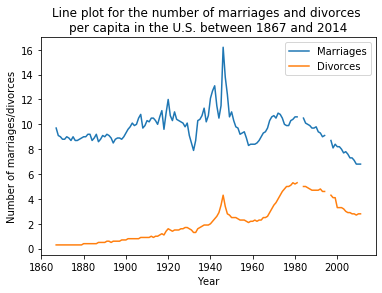

In [77]:
plt.plot(yr, marr_1000, label = 'Marriages')
plt.plot(yr, divo_1000, label = 'Divorces')
plt.title("Line plot for the number of marriages and divorces \nper capita in the U.S. between 1867 and 2014")
plt.xlabel('Year')
plt.ylabel('Number of marriages/divorces');
plt.legend()
plt.show()

### Question 7: Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000. Don't forgot to label your axes!

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
us_marr_divo = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marr_divo.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [80]:
us_marr_divo_1900_1950_2000 = us_marr_divo[us_marr_divo['Year'].apply(lambda x: x in [1900, 1950, 2000])]
us_marr_divo_1900_1950_2000.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


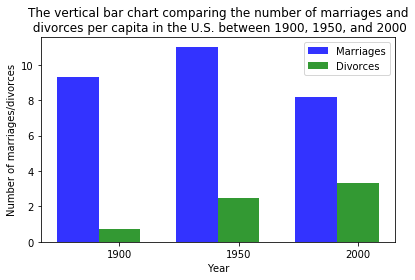

In [81]:
n_groups = 3
marr_3 = us_marr_divo_1900_1950_2000.Marriages_per_1000
divo_3 = us_marr_divo_1900_1950_2000.Divorces_per_1000

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, marr_3, bar_width,alpha = opacity,
color = 'b', label = 'Marriages')

rects2 = plt.bar(index + bar_width, divo_3, bar_width,
alpha = opacity, color = 'g',label = 'Divorces')

plt.xlabel('Year')
plt.ylabel('Number of marriages/divorces')
plt.title('The vertical bar chart comparing the number of marriages and\n divorces per capita in the U.S. between 1900, 1950, and 2000')
plt.xticks(index + bar_width, ('1900', '1950', '2000'))
plt.legend()

plt.tight_layout()
plt.show()

### Question 8: Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forgot to label your axes!

In [82]:
import pandas as pd

In [83]:
hw_actor_kills = pd.read_csv('actor_kill_counts.csv')
hw_actor_kills.sort_values(by = ['Count'], ascending = True, inplace = True)
hw_actor_kills.head()

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207


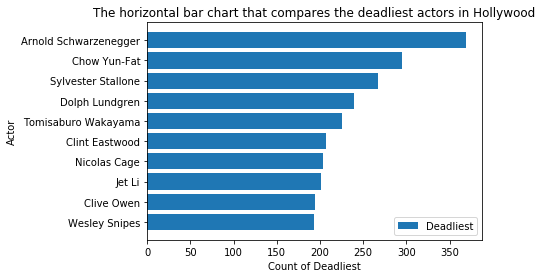

In [84]:
# data to plot
Act = list(hw_actor_kills.Actor)
Cou = list(hw_actor_kills.Count)

plt.barh(Act, Cou, align='center', label="Deadliest")
plt.legend()

plt.ylabel('Actor')
plt.xlabel('Count of Deadliest')
plt.title('The horizontal bar chart that compares the deadliest actors in Hollywood')

plt.show()

### Question 9: Create a pie chart showing the fraction of all Roman Emperors that were assassinated. Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [85]:
import pandas as pd 
roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
roman_emperors.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide


In [86]:
ass = roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())
assa_emp = roman_emperors[ass]
assa_emp.head()

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
5,Galba,0.58,Assassinated


In [87]:
ass_num = len(assa_emp)
oth_num = len(roman_emperors) - ass_num
print(ass_num)

30


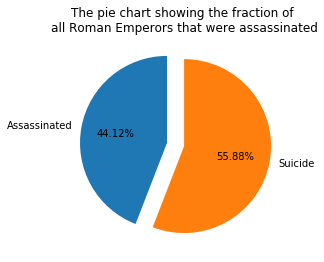

In [88]:
import matplotlib.pyplot as plt
import numpy as np

plt.pie([ass_num, oth_num], labels = ['Assassinated', 'Suicide'], 
        autopct='%1.2f%%', explode=[0.2, 0], startangle=90)
plt.title('The pie chart showing the fraction of \nall Roman Emperors that were assassinated')
plt.show() 

### Question 10: Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009. Don't forget to label your axes! Color each dot according to it year.

In [89]:
import pandas as pd 
arc_rev_sv_cs = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arc_rev_sv_cs

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


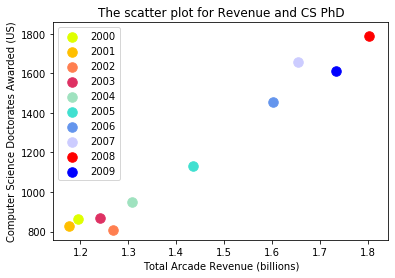

In [90]:
x = arc_rev_sv_cs['Total Arcade Revenue (billions)']
y = arc_rev_sv_cs['Computer Science Doctorates Awarded (US)']
fig = plt.figure()
ax1 = fig.add_subplot(111)
my_color = ['#DFFF00', '#FFBF00', '#FF7F50', '#DE3163', '#9FE2BF', 
        '#40E0D0', '#6495ED', '#CCCCFF', '#FF0000', '#0000FF']
yr = arc_rev_sv_cs['Year']
for i in range(10):
    ax1.scatter(x[i], y[i], s=90, c=my_color[i], #marker="s", 
                label=yr[i])
plt.title('The scatter plot for Revenue and CS PhD')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.xlabel('Total Arcade Revenue (billions)')
plt.legend()
plt.show()